# Practical 1: Pre-processing
#### Ayoub Bagheri
<img src="img/uu_logo.png" alt="logo" align="right" title="UU" width="50" height="20" />

In this practical, we are going to do some text preprocessing! Are you looking for Python documentation to refresh you knowledge of programming? If so, you can check https://docs.python.org/3/reference/

Google Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with:
* Zero configuration required
* Free access to GPUs
* Easy sharing

Colab notebooks are Jupyter notebooks that are hosted by Colab. Here you can find links to more detailed introductions to Colab: https://colab.research.google.com/notebooks/intro.ipynb

We need the following packages:

In [1]:
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd 
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # for bag of words feature extraction
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

Use can simply run `!pip install package_name` to install a package. Generally, you only need to install each package once on your computer and load it again, however, in Colab you may need to reinstall a package once you are reconnecting to the network.

NB: nltk package comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: http://nltk.org/nltk_data/

To install the data, after installing nltk, use nltk’s data downloader as "nltk.download()".

### Let's get started!

### Pre-processing a simple text
#### `If you feel comfortable with Python and Google colab skip to question 8.`

Open Colab and create a new empty notebook to work with Python 3! Go to https://colab.research.google.com/ and login with your account. Then click on "File $\rightarrow$ New notebook".

1\. **Text is known as a string object or as an array of characters. Create an object _a_ with the value of "Hello @Text Mining World! I'm here to learn everything, right?", and then print it!**

In [2]:
a = "Hello @Text Mining World! I'm here to learn everything, right?"
a

"Hello @Text Mining World! I'm here to learn everything, right?"

2\. **Since this is an array, print the first and last character of your object.**

In [3]:
print(a[0]) # if you do not use the print function, it will print only the last argumnet in the cell
print(a[61])
l = len(a)
print("Length of your string is: ", l)
print(a[l-1])

H
?
Length of your string is:  62
?


3\. **Use the function lower() from the nltk package to convert the characters in the object to their lowercase form and save it into a new object b.**

In [4]:
# nltk.download()
b = a.lower()
b

"hello @text mining world! i'm here to learn everything, right?"

4\. **Use the _string_ package to print the list of punctuations.**

Punctuations can separate characters, words, phrases, or sentences. In some applications they are very important to the task at hand, in others they are redundant and should be removed!

In [5]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


5\. **Use the code below to remove the punctuations from the our string. Name your object c.**

In [6]:
# Remmebr there are many ways to remove punctuations! This is only one of them:
c = "".join([char for char in b if char not in string.punctuation])
print(c)

hello text mining world im here to learn everything right


6\. **Use the `word_tokenize` function from _nltk_ and tokenize string *b*. Compare that with the tokenization of string _c_.**

In [7]:
print(word_tokenize(b))
print(word_tokenize(c))
# You might need to download Punkt Tokenizer Models
# In this case, run the code nltk.download('punkt')

['hello', '@', 'text', 'mining', 'world', '!', 'i', "'m", 'here', 'to', 'learn', 'everything', ',', 'right', '?']
['hello', 'text', 'mining', 'world', 'im', 'here', 'to', 'learn', 'everything', 'right']


We see that the main difference is in punctuations, however, we also see that some words are now combined togehter in the tokenization of string c.

7\. **Use sent_tokenize function from the _nltk_ package and split string b into sentences. Compare that with the sentence tokenization of string c.**

In [8]:
print(sent_tokenize(b))
print(sent_tokenize(c))

['hello @text mining world!', "i'm here to learn everything, right?"]
['hello text mining world im here to learn everything right']


Sentence tokenization can be used in different purposes. For example, to count average words per sentence.

### Pre-processing a text corpus

Pre-processing a corpus is similar to pre-processing a text string. 

Here are some resources for puclic text data sets:
- CLARIN Resource Families: https://www.clarin.eu/portal
- UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=nameUp&view=table
- Kaggle: https://www.kaggle.com/

Here, we want to analyze and pre-process the `Taylor Swift song lyrics` from all her albums. We downloaded this data set from the Kaggle website and put that already in the data folder. Here, you can find more information about the original data set: https://www.kaggle.com/PromptCloudHQ/taylor-swift-song-lyrics-from-all-the-albums

8\. **Read the “taylor_swift.csv” data set. Check the head and tail functions.**

In [9]:
ts_lyrics = pd.read_csv("data/taylor_swift_lyrics.csv")

In [10]:
ts_lyrics.head()

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...


In [11]:
ts_lyrics.tail()

,Artist,Album,Title,Lyrics
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...
131,Taylor Swift,folklore,hoax,My only one\nMy smoking gun\nMy eclipsed sun\n...


9\. **Use the code below to replace the '\n' notations with a space character to remove the line breaks. In this code, a new column has been added to the dataframe, _Preprocessed_ _Lyrics_. We are going to fill this column out with the preprocessed text including the steps in the following questions.**

In [12]:
def remove_linebreaks(text):
    """custom function to remove the line breaks"""
    return re.sub(r'\n', ' ', text)

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Lyrics"].apply(lambda text: remove_linebreaks(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...","State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...","Drew looks at me, I fake a smile so he won't s..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...","I don't know what I want, so don't ask me 'Cau..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


10\. **Write a custom function to remove the punctuations. (Hint: You can use the method in question 5 or make use of the function maketrans from the string package.)**

In [13]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', string.punctuation))

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_punctuation(text))
ts_lyrics.head()


,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",State the obvious I didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",Drew looks at me I fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",I dont know what I want so dont ask me Cause I...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


11\. **Convert the characters to their lower forms. Think about why and when we need this step in our analysis.**

In [14]:
ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].str.lower()
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,he said the way my blue eyes shinx put those g...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state the obvious i didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks at me i fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",i dont know what i want so dont ask me cause i...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,you have a way of coming easily to me and when...


12\. **Use the code below to list the 20 most frequent terms in your preprocessed lyrics.**

In [15]:
# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax, 
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)


[('i', 2377), ('you', 2319), ('the', 1623), ('and', 1403), ('me', 885), ('to', 843), ('a', 787), ('in', 686), ('it', 674), ('my', 642), ('of', 492), ('your', 475), ('we', 441), ('that', 436), ('all', 436), ('but', 428), ('like', 406), ('im', 404), ('this', 394), ('know', 380)]


You see that these are mainly the stop words. Before removing them let's plot a worcloud of our data.

13\. **Use the code below to plot a wordcloud with a maximum of 50 words. Check the command _?WordCloud_ to review the help page of this function.**

In [16]:
?WordCloud

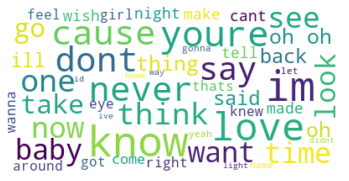

In [17]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

14\. **Run the codes given below to remvoe the stop words, and update the stop words by adding words: "im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt". Show the 20 most frequent terms and plot the wordcould of 50 words again.**

In [18]:
# run the code nltk.download('stopwords') if needed
stop_words = set(stopwords.words('english'))
print(stop_words)

{'of', 'you', 'because', 'just', 'ma', 'same', 'himself', 'ours', 'out', 'be', 'where', 'below', 'its', 'is', 'isn', 'yourselves', 'again', 'me', 'do', 'hadn', 'not', 'd', 'herself', 'yours', 'were', 'here', 'has', 'further', 'are', 'have', 'until', 'above', 'aren', 'ourselves', 'off', 'being', 'each', 'and', "hadn't", 'these', 'mustn', 'it', "doesn't", 'haven', "weren't", 'there', 'when', 've', 'can', "don't", 'them', 'wasn', 'in', 'couldn', 'for', 'a', 'those', 'than', 'wouldn', 'o', "mightn't", 'm', "shan't", 'through', "hasn't", 'too', 'over', 'most', 'on', 'did', 't', 'hasn', "wasn't", 'i', 'themselves', "she's", "couldn't", 'whom', 'with', 'if', 'your', 'her', 'didn', 'he', 's', 'mightn', 'how', 'few', 'shouldn', "should've", 'by', 'before', 'to', 'now', 'an', 'both', 'during', 'itself', 'up', 'his', "haven't", 're', 'only', 'they', "that'll", 'some', "won't", 'so', 'will', 'such', 'doesn', 'against', 'the', 'was', "mustn't", 'after', 'more', 'won', 'does', "you've", "isn't", 'ou

In [19]:
stop_words.update(["im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt"])
# stop_words.discard('word') # this is when you want to remove a word from the list
print(stop_words)

{'of', 'you', 'because', 'just', 'ma', 'same', 'himself', 'ours', 'out', 'be', 'where', 'below', 'its', 'is', 'isn', 'yourselves', 'again', 'me', 'do', 'hadn', 'not', 'd', 'herself', 'yours', 'were', 'here', 'has', 'further', 'are', 'have', 'until', 'above', 'aren', 'ourselves', 'off', 'being', 'each', 'youre', 'and', "hadn't", 'these', 'mustn', 'it', "doesn't", 'haven', "weren't", 'there', 'when', 've', 'can', "don't", 'them', 'wasn', 'ive', 'in', 'couldn', 'for', 'a', 'those', 'than', 'wouldn', 'o', "mightn't", 'm', "shan't", 'through', "hasn't", 'too', 'over', 'most', 'on', 'did', 't', 'hasn', "wasn't", 'i', 'themselves', "she's", "couldn't", 'whom', 'with', 'if', 'id', 'your', 'her', 'didn', 'he', 'im', 's', 'mightn', 'how', 'few', 'shouldn', "should've", 'by', 'before', 'to', 'now', 'an', 'both', 'during', 'itself', 'up', 'his', "haven't", 're', 'only', 'they', "that'll", 'some', "won't", 'so', 'will', 'such', 'doesn', 'against', 'the', 'was', "mustn't", 'after', 'more', 'won', 'd

In [20]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stop_words])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_stopwords(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eyes shinx put georgia stars sha...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks fake smile wont see want need every...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


In [21]:
from collections import Counter
# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax, 
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
  
print(most_occur)

[('like', 406), ('know', 380), ('oh', 322), ('never', 294), ('love', 246), ('back', 240), ('time', 224), ('cause', 213), ('one', 177), ('say', 176), ('see', 170), ('got', 159), ('wanna', 158), ('think', 153), ('baby', 153), ('come', 150), ('go', 149), ('want', 142), ('ever', 134), ('could', 133)]


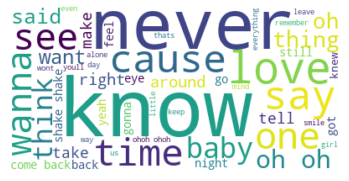

In [22]:
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

15\. **We can apply stemming or lemmatization on our text data. Apply a lemmatizer from nltk and save the results.**

In [23]:
# run the code nltk.download('wordnet') if needed
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: lemmatize_words(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eye shinx put georgia star shame...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew look fake smile wont see want need everyt...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


And here is the code for stemming:

In [24]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# since we applied the lemmatization, we don't apply stemming; though you can try it!
# ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: stem_words(text))
# ts_lyrics.head()


The PorterStemmer is proposed for English. If we are working with other languages, we can use snowball stemmer. The supported languages for snowball stemmer are:

In [25]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

### Vector space model: Bag-of-Words

16\. **Use the CountVectorizer from the sklearn package and build a bag of words model on _Preprocessed Lyrics_ based on term frequency. Check the shape of the output matrix.**

In [26]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer1 = CountVectorizer(max_features = 3000) 

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; 
# second, it transforms our data into feature vectors. 
# The input to fit_transform should be a list of strings.
dtm = vectorizer1.fit_transform(ts_lyrics["Preprocessed Lyrics"])
print(dtm.shape)

(132, 2597)


In [27]:
dtm

<132x2597 sparse matrix of type '<class 'numpy.int64'>'
	with 10530 stored elements in Compressed Sparse Row format>

In [28]:
# we can convert it to a dataframe
dtm_df = dtm.toarray()
dtm_df = pd.DataFrame(dtm_df)
dtm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


17\. **Inspect the first 100 terms in the vocabulary.**

In [29]:
# Take a look at the words in the vocabulary
vocab = vectorizer1.get_feature_names()
print(vocab[1:100])

['16', '16th', '45', '4am', 'aah', 'abigail', 'absent', 'absurd', 'accent', 'accident', 'accused', 'ace', 'achilles', 'aching', 'acing', 'across', 'act', 'acted', 'actress', 'actually', 'add', 'adjusting', 'admit', 'adore', 'adventure', 'affair', 'afraid', 'afterglow', 'afternoon', 'age', 'ago', 'ah', 'ahah', 'ahahah', 'ahead', 'ahh', 'aim', 'aint', 'air', 'airplane', 'aisle', 'album', 'aligned', 'alive', 'alls', 'almost', 'alone', 'along', 'alpha', 'already', 'alright', 'altar', 'always', 'ambition', 'amen', 'american', 'americana', 'amnesia', 'amount', 'andi', 'ane', 'angel', 'angry', 'another', 'answer', 'anthem', 'anther', 'anticipation', 'anybody', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apart', 'apartment', 'apology', 'applause', 'archer', 'architect', 'arent', 'argue', 'arm', 'armor', 'around', 'arrowhead', 'ash', 'aside', 'ask', 'asked', 'asking', 'asleep', 'assume', 'assumption', 'ate', 'ateam', 'attached', 'attack', 'attitude']


C:\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


18\. **Using TfidfVectorizer, you can create a model based on tfidf. Use the code below to apply a TfidfVectorizer on your text data. Does the shape of the output matrix differ from dtm?**

In [30]:
# Create TfidfVectorizer object
vectorizer2 = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer2.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(132, 2597)


19\. **Use the TfidfVectorizer to create an n-gram based model with n = 1 and 2. (Hint: Use the ngram_range argument to determine the lower and upper boundary of the range of n-values for different n-grams to be extracted.)**

In [31]:
# Create TfidfVectorizer object
vectorizer3 = TfidfVectorizer(ngram_range=(1, 2))

# Generate matrix of word vectors
tfidf_matrix3 = vectorizer3.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix3.shape)

(132, 15016)


20\. **We want to compare the lyrics of Friends theme song with the lyrics of Taylor Swift's songs and find the most similar one. Use the code below to, first, apply the pre-processing steps and then transform the text into counts and tfidf vectors. Do the bag of words models (tf vs tfidf) agree on the most similar song to Friends theme song?**

In [32]:
friends_theme_lyrics = "So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn\'t been your day, your week, your month, or even your year. But, I\'ll be there for you, when the rain starts to pour. I\'ll be there for you, like I\'ve been there before. I\'ll be there for you, cause you\'re there for me too."
friends_theme_lyrics

"So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn't been your day, your week, your month, or even your year. But, I'll be there for you, when the rain starts to pour. I'll be there for you, like I've been there before. I'll be there for you, cause you're there for me too."

In [33]:
friends_theme_lyrics = remove_punctuation(friends_theme_lyrics)
friends_theme_lyrics = friends_theme_lyrics.lower()
friends_theme_lyrics = remove_stopwords(friends_theme_lyrics)
friends_theme_lyrics = lemmatize_words(friends_theme_lyrics)
friends_theme_lyrics

'one told life going way job joke broke love life doa like always stuck second gear day week month even year rain start pour like cause'

In [34]:
friends_theme_lyrics_tf = vectorizer1.transform([friends_theme_lyrics])
friends_theme_lyrics_tf.shape
dtm.shape

(132, 2597)

In [35]:
# compute and print the cosine similarity matrix
cosine_sim_dtm = cosine_similarity(dtm, friends_theme_lyrics_tf)

In [36]:
max_index = np.argmax(cosine_sim_dtm, axis=0)
print(cosine_sim_dtm[max_index])
max_index

[[0.24685715]]


array([38], dtype=int64)

In [37]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
38,Taylor Swift,Speak Now,The Story of Us,I used to think one day we'd tell the story of...,used think one day wed tell story u met spark ...


In [38]:
ts_lyrics["Preprocessed Lyrics"].iloc[38]

'used think one day wed tell story u met spark flew instantly people would say theyre lucky one used know place spot next searching room empty seat cause lately even know page oh simple complication miscommunications lead fall many thing wish knew many wall break standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy next chapter howd end way see nervously pulling clothes trying look busy best avoid starting think one day tell story u losing mind saw held pride like held oh scared see ending pretending nothing tell miss know never heard silence quite loud standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy looking like contest act like care le liked better side battle hand would lay armor youd say youd rather love fight many thing wish knew story u might ending soon standing alone crowded room speaking dying know killing li

In [39]:
friends_theme_lyrics_tfidf = vectorizer3.transform([friends_theme_lyrics])
print(friends_theme_lyrics_tfidf.shape)
print(tfidf_matrix3.shape)
# compute and print the cosine similarity matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix3, friends_theme_lyrics_tfidf)

(1, 15016)
(132, 15016)


In [40]:
max_index = np.argmax(cosine_sim_tfidf, axis=0)
print(cosine_sim_tfidf[max_index])
max_index

[[0.09768082]]


array([16], dtype=int64)

In [41]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
16,Taylor Swift,Fearless,Forever & Always,"Once upon a time, I believe it was a Tuesday w...",upon time believe tuesday caught eye caught on...


In [42]:
ts_lyrics["Preprocessed Lyrics"].iloc[16]

'upon time believe tuesday caught eye caught onto something hold onto night looked eye told loved kidding cause seems thing breaking almost never speak feel welcome anymore baby happened please tell cause one second perfect halfway door stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always line say something way honest made run hide like scared little boy looked eye thought knew minute sure here everything coming nothing here silence cut core going thought knew minute anymore stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always mean baby think oh back baby back forget everything back baby back forget everything cause rain bedroom everything wrong rain rain gone cause said forever always oh stare phone still called feel low feel nothing flashback said forever always rain bedroom everything wrong